In [1]:
# 数值计算包NumPy
import numpy as np

In [2]:
# 一维数组
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

In [3]:
# 二维数组
np.array([[4, 9, 2], [3, 5, 7], [8, 1, 6]])

array([[4, 9, 2],
       [3, 5, 7],
       [8, 1, 6]])

In [4]:
# 3*2矩阵与2*1矩阵相乘，方法形式和等价的运算符形式
a = np.array([[2, 1], [1, 2], [1, 1]])
b = np.array([1, 2])
a.dot(b), a @ b

(array([4, 5, 3]), array([4, 5, 3]))

In [5]:
# 使用列表进行计算
from random import randint
biglist = [randint(1, 100) for _ in range(100000)]

def reciprocal(values):
    for i, v in enumerate(values):
        values[i] = 1/v
    return values

%timeit reciprocal(biglist)

9.2 ms ± 530 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
# 使用NumPy进行计算
bigarray = np.random.randint(1, 100, size=100000)
%timeit 1/bigarray

114 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


运行耗时：0.171875秒。


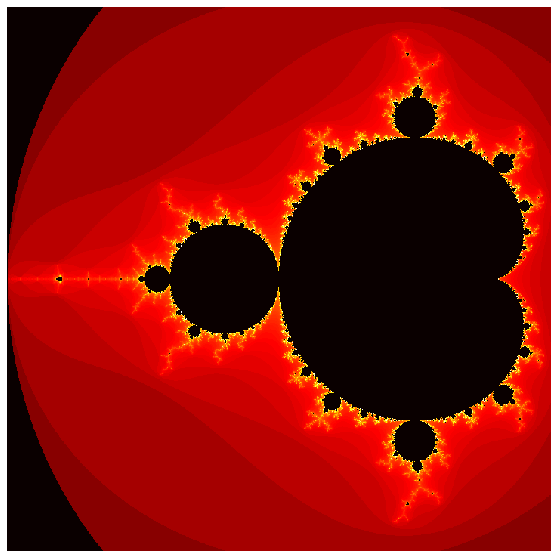

In [7]:
# 使用NumPy绘制曼德布罗分形图
import time
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from numba import jit, guvectorize, complex64, int32
%matplotlib inline


@jit(int32(complex64, int32))
def mandelbrot(c, maxiter):
    nreal = 0
    real = 0
    imag = 0
    for n in range(maxiter):
        nreal = real * real - imag * imag + c.real
        imag = 2 * real * imag + c.imag
        real = nreal
        if real * real + imag * imag > 4.0:
            return n
    return 0


@guvectorize(
    [(complex64[:], int32[:], int32[:])], "(n),()->(n)", target="parallel")
def mandelbrot_numpy(c, maxit, output):
    maxiter = maxit[0]
    for i in range(c.shape[0]):
        output[i] = mandelbrot(c[i], maxiter)


def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, maxiter):
    r1 = np.linspace(xmin, xmax, width, dtype=np.float32)
    r2 = np.linspace(ymin, ymax, height, dtype=np.float32)
    c = r1 + r2[:, None] * 1j
    n3 = mandelbrot_numpy(c, maxiter)
    return (r1, r2, n3.T)


def mandelbrot_image(
    xmin, xmax, ymin, ymax, width=10, height=10,
        maxiter=256, cmap="jet", gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x, y, z = mandelbrot_set(
        xmin, xmax, ymin, ymax, img_width, img_height, maxiter)
    plt.figure(figsize=(width, height), dpi=dpi)
    ticks = np.arange(0, img_width, 3 * dpi)
    x_ticks = xmin + (xmax - xmin) * ticks / img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax - ymin) * ticks / img_width
    plt.yticks(ticks, y_ticks)
    plt.axis("off")
    norm = colors.PowerNorm(gamma)
    plt.imshow(z.T, cmap=cmap, norm=norm, origin="lower")


if __name__ == "__main__":
    t1 = time.process_time()
    mandelbrot_image(-2, 0.5, -1.25, 1.25, cmap="hot")
    print(f"运行耗时：{time.process_time() - t1}秒。")